<a href="https://www.kaggle.com/code/umarzafar/food-trends-outlook-zomato-restaurants?scriptVersionId=152174288" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurants-dataset/zomato.csv


# Key Insights from the below Analysis: 
1. 'Quick Bar' type restaurants are the most common in Zomato Bangluru
2.  Customers like 'Bar and Pub' restaurants the most(top rated)
3.  'Food Court and Casual Dining' are the least Rated(3.0)
4.  Ratings of Restaurants are not much dependent upon Averrage Cost(2 People)
5.  The most Popular and liked cuisines are:
    i)  Continental
    ii) North Indian
    iii) South Indian
    iv) Finger Food
    v) Italian
 6. The least rated cuisines are:
     i) Chinese
    ii) European
    iii) Salad
 7. The most expensive cuisines are French and Italian
 8. The Cheapest cuisines are Burger, Drinks and Juices
 9. Facility of Online Order does not impact Ratings of restaurants
10. Table booking facility highly impacts Average Cost (Restaurants offering table booking     are expensive).
11. Restaurants offering 'Fine Dining' and 'Microbrewery' are the most expensive.
12. 64% restaurants fall in the price range of Rs 1-500.
13. 19% restaurants fall in the price range of Rs 500-800

# Getting Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
my_data = pd.read_csv(r"/kaggle/input/zomato-restaurants-dataset/zomato.csv")

In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           7105 non-null   int64  
 1   Unnamed: 0             7105 non-null   int64  
 2   restaurant name        7105 non-null   object 
 3   restaurant type        7105 non-null   object 
 4   rate (out of 5)        7037 non-null   float64
 5   num of ratings         7105 non-null   int64  
 6   avg cost (two people)  7048 non-null   float64
 7   online_order           7105 non-null   object 
 8   table booking          7105 non-null   object 
 9   cuisines type          7105 non-null   object 
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 666.2+ KB


# Removing irrelevant columns

In [5]:
my_data=my_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

# Change Names of some columns for our Ease

In [6]:
my_data.rename(columns = {'avg cost (two people)' :'avg cost'}, inplace = True)
my_data.rename(columns = {'rate (out of 5)' :'rating'}, inplace = True)

# Now checking Null values in Dataset

In [7]:
my_data.isnull().sum()

restaurant name     0
restaurant type     0
rating             68
num of ratings      0
avg cost           57
online_order        0
table booking       0
cuisines type       0
area                0
local address       0
dtype: int64

column  'Ratings' has 68 and 'avg cost' has 57 null values

# The best approach here is to Fill all the Null Enteries with the 'Mean Value' of that column. It will not impact the overall mean of the column.

In [8]:
my_data['rating'].fillna(my_data['rating'].mean(), inplace = True)
my_data['avg cost'].fillna(my_data['avg cost'].mean(), inplace = True)

In [9]:
my_data.isnull().sum()

restaurant name    0
restaurant type    0
rating             0
num of ratings     0
avg cost           0
online_order       0
table booking      0
cuisines type      0
area               0
local address      0
dtype: int64

Now no null value here

# NOW WE PERFORM EDA

# Getting number of restaurant type

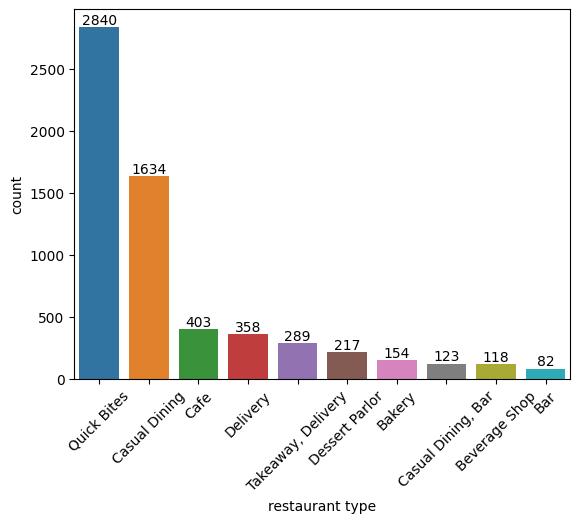

In [10]:
res_data = my_data['restaurant type'].value_counts()
#Getting Top10
res_plot = sns.barplot(x=res_data.index[0:10], y=res_data[0:10])
res_plot.set_xticklabels(res_plot.get_xticklabels(), rotation=45)
#Container for Showing values
for i in res_plot.containers:
    res_plot.bar_label(i,)
plt.show()

**'Quick Bites' resturants top**

# Now we Calculate NUMBER OF RATING w.r.t Restaurant type

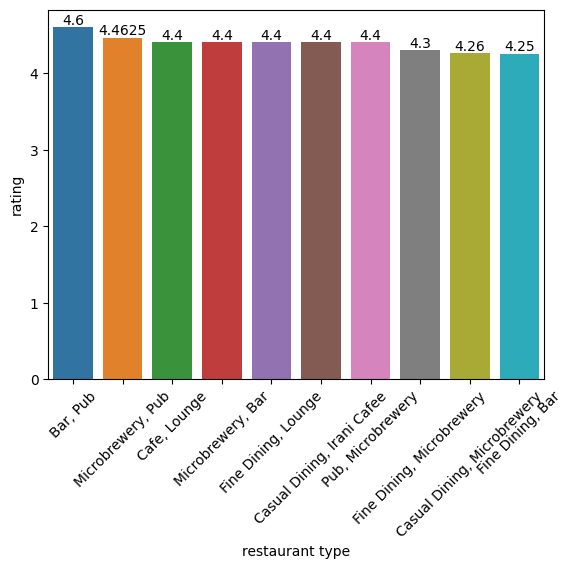

In [11]:
res_gr=my_data.groupby('restaurant type')['rating'].mean() #Each group alongwith mean rating
res_gr=res_gr.sort_values(ascending=False)

#Getting 10 top rated restaurants type
res_plot = sns.barplot(x=res_gr.index[0:10], y=res_gr[0:10])
res_plot.set_xticklabels(res_plot.get_xticklabels(), rotation=45)
#Container for Showing values
for i in res_plot.containers:
    res_plot.bar_label(i,)
plt.show()

**'Bar and Pub' are the most Rated(4.6) Restaurants type** 

# Getting 10 least Rated restaurants type

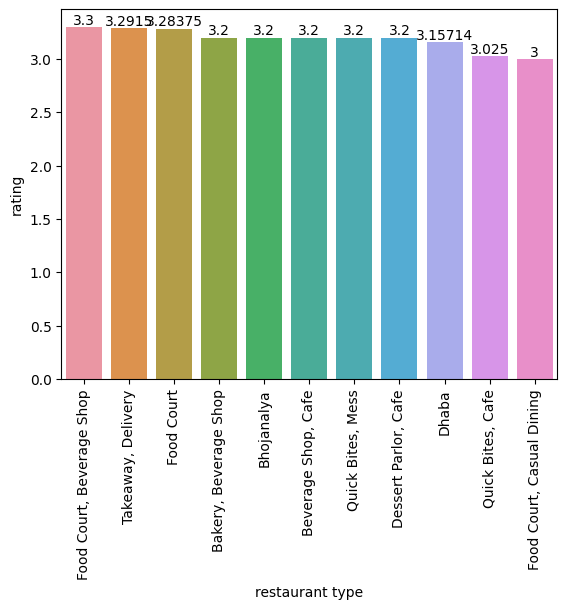

In [12]:

res_plot = sns.barplot(x=res_gr.index[70:81], y=res_gr[70:81])
res_plot.set_xticklabels(res_plot.get_xticklabels(), rotation=90)
#Container for Showing values
for i in res_plot.containers:
    res_plot.bar_label(i,)
plt.show()


**Food Court and Casual Dining has the least Ratings(3.0)**

# NOW WE FIND RELATIONSHIP OF 'AVERAGE COST' AND 'RATING'

# Whether increase in 'Avg Cost' decreases 'Rating' or not?"

In [13]:
my_data[['rating', 'avg cost']].corr()

,rating,avg cost
rating,1.000000,0.374086
avg cost,0.374086,1.000000


<Axes: >

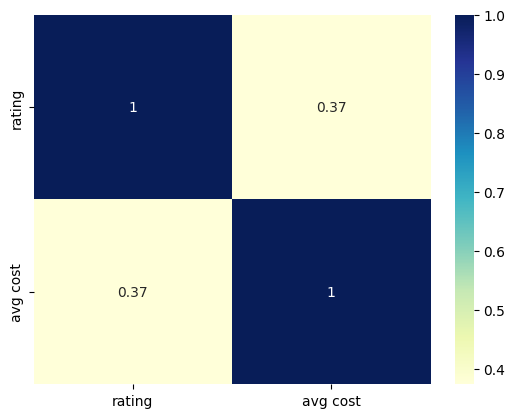

In [14]:
#Showing correlation using HeatMap
sns.heatmap(my_data[["rating","avg cost"]].corr(), cmap="YlGnBu", annot=True)

**These two variables have a correlation of 0.37. Not much strong correlation.**

**It means Rating is not much dependent upon Average cost**

# Now we Find the most Popular Cuisine Type

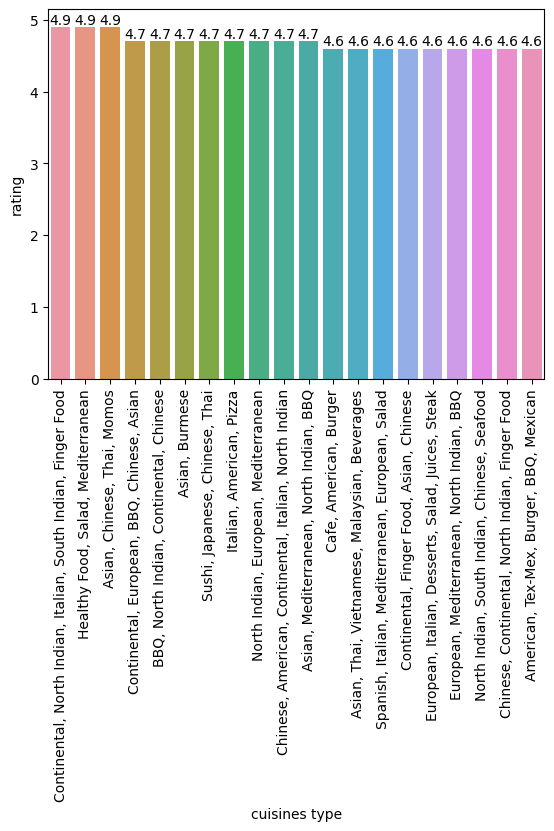

In [15]:
cuisine_gr=my_data.groupby('cuisines type')['rating'].mean().sort_values(ascending=False)
#Getting top 20
c_plot = sns.barplot(x=cuisine_gr.index[0:20], y=cuisine_gr[0:20])
c_plot.set_xticklabels(c_plot.get_xticklabels(), rotation=90)
#Container for Showing values
for i in c_plot.containers:
    c_plot.bar_label(i,)
plt.show()

**Continental alongwith North Indian and South Indian cuisines are the top rated(4.9)**

# Now the Least Rated Cuisines

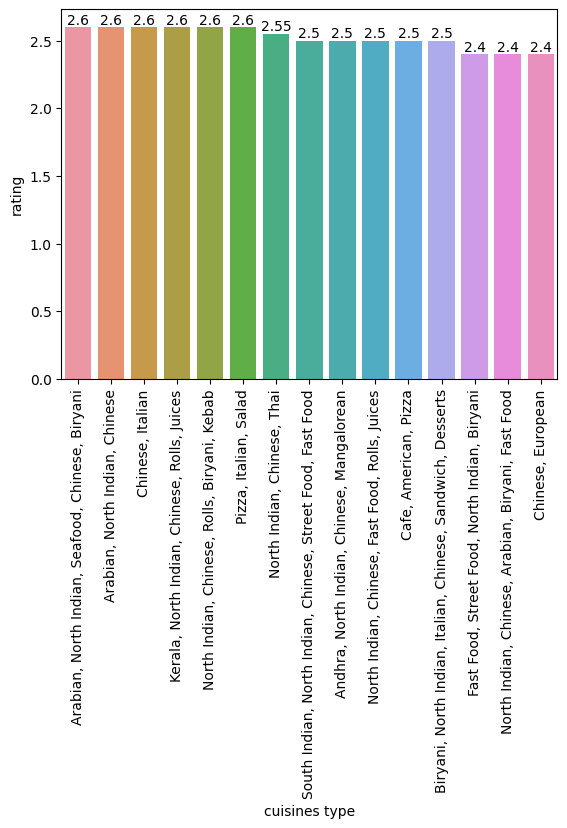

In [16]:
c_plot = sns.barplot(x=cuisine_gr.index[2160:2175], y=cuisine_gr[2160:2175])
c_plot.set_xticklabels(c_plot.get_xticklabels(), rotation=90)
#Container for Showing values
for i in c_plot.containers:
    c_plot.bar_label(i,)
plt.show()

**Chinese with European is the least rated(2.4) cuisine**

# NOW WE EXPLORE IF ONLINE ORDER IMPACTS RATINGS OR NOT

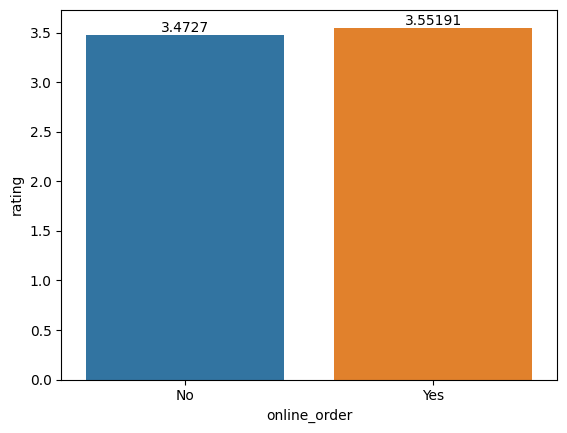

In [17]:
rating_by_order = my_data.groupby('online_order')['rating'].mean()
rating_plot = sns.barplot(x=rating_by_order.index, y= rating_by_order)
#c_plot.set_xticklabels(c_plot.get_xticklabels(), rotation=90)
#Container for Showing values
for i in rating_plot.containers:
    rating_plot.bar_label(i,)
plt.show()

**Average rating of Online order and Dining order are almost same.**

**It means online order availability does'nt impact Ratings**

# Now we want to see if 'TABLE BOOKING' Facility Impacts 'AVERAGE COST' or Not

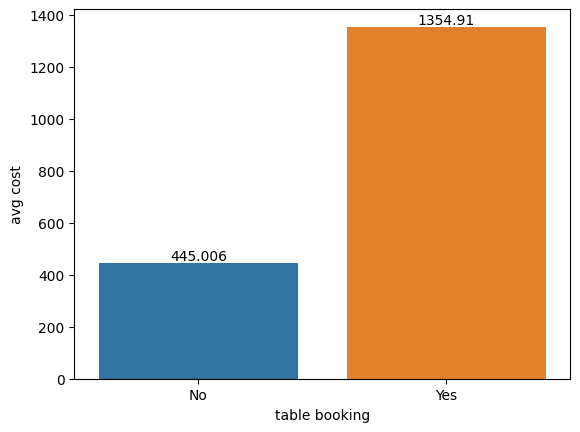

In [18]:
table_cost=my_data.groupby('table booking')['avg cost'].mean()

t_plot = sns.barplot(x=table_cost.index, y= table_cost)
#Container for Showing values
for i in t_plot.containers:
    t_plot.bar_label(i,)
plt.show()


**Restaurants offering Table Booking have High Average Cost**

# WHICH TYPE OF CUISINE ARE THE MOST EXPENSIVE(HEIGHEST AVERAGE COST)?

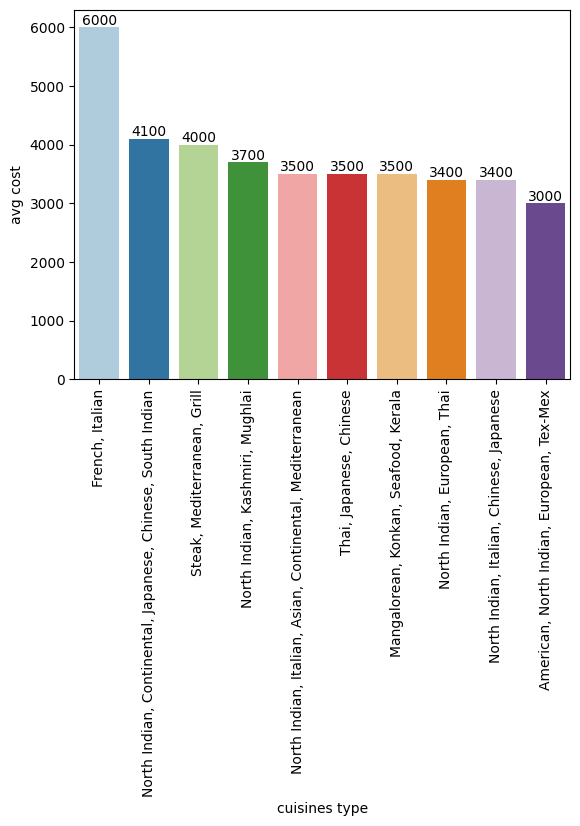

In [19]:
c_cost=my_data.groupby('cuisines type')['avg cost'].mean().sort_values(ascending=False)

#Displaying top10 with heighest avg cost

c_plot = sns.barplot(x=c_cost.index[0:10], y=c_cost[0:10], palette='Paired')
c_plot.set_xticklabels(c_plot.get_xticklabels(), rotation=90)
#Container for Showing values
for i in c_plot.containers:
    c_plot.bar_label(i,)
plt.show()

**French and Italian are the most expensive Cuisines with average cost of INR 6000/-**

# NOW SHOWING LOW COST CUISINES

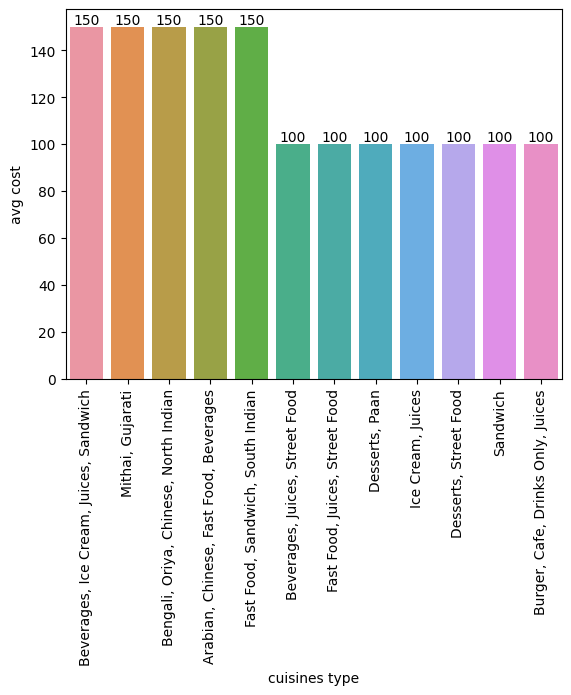

In [20]:
c_plot = sns.barplot(x=c_cost.index[2163:2175], y=c_cost[2163:2175])
c_plot.set_xticklabels(c_plot.get_xticklabels(), rotation=90)
#Container for Showing values
for i in c_plot.containers:
    c_plot.bar_label(i,)
plt.show()

**Burger, cafe & drinks have the least average cost(Rs. 100)**

# WHICH TYPE OF RESTAURANT HAS THE HEIGHEST AVERAGE COST?

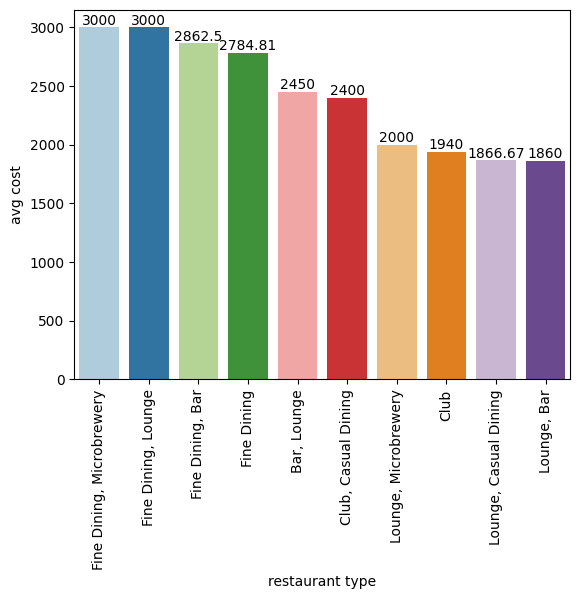

In [21]:
#Displaying top10 with heighest avg cost
res_cost=my_data.groupby('restaurant type')['avg cost'].mean().sort_values(ascending=False)
res_plot = sns.barplot(x=res_cost.index[0:10], y=res_cost[0:10],color = 'blue', palette = 'Paired')
res_plot.set_xticklabels(res_plot.get_xticklabels(), rotation=90)
#Container for Showing values
for i in res_plot.containers:
    res_plot.bar_label(i,)
plt.show()


**Fine Dining and Microbrewery has the highest avg cost**

# Now we find restaurant type with low average cost

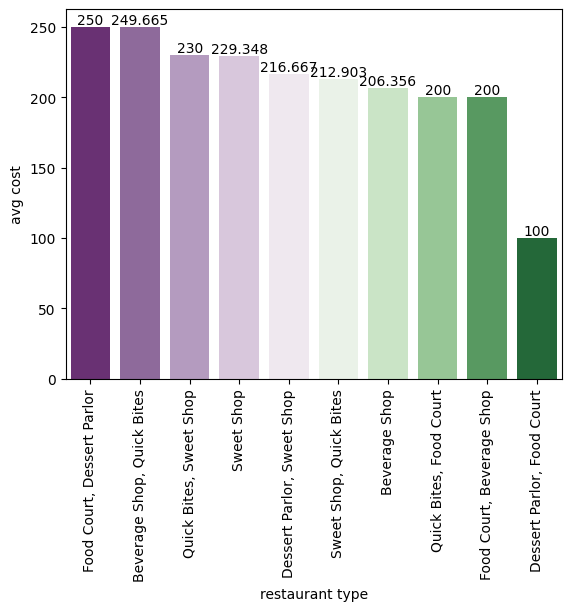

In [22]:
res_plot = sns.barplot(x=res_cost.index[71:81], y=res_cost[71:81],color = 'red', palette = 'PRGn')
res_plot.set_xticklabels(res_plot.get_xticklabels(), rotation=90)
#Container for Showing values
for i in res_plot.containers:
    res_plot.bar_label(i,)
plt.show()

**Dessert Parlor and Food Court has the lowest Avg Cost**

# IN WHICH PRICE RANGE THE MOST RESTAURANTS FALL?

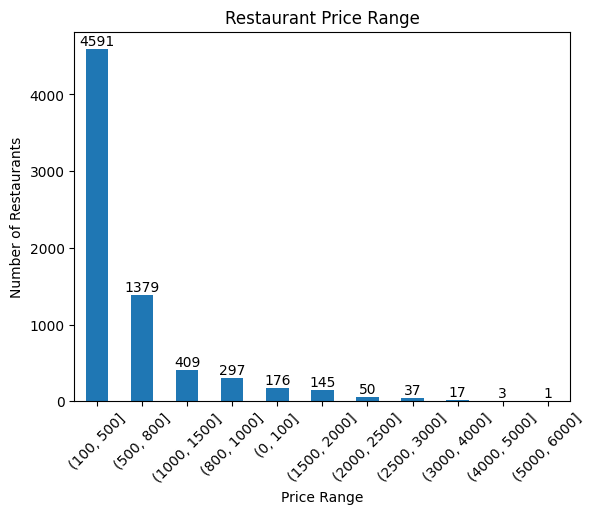

In [23]:
#Creating bins for Price range
bins=[0,100,500,800,1000,1500,2000,2500,3000,4000,5000,6000]

#Using cut function to categorize restaurant into cost range
my_data['price range']=pd.cut(my_data['avg cost'], bins = bins)
price_range_count=my_data['price range'].value_counts()
ax=price_range_count.plot(kind='bar', xlabel='Price Range', ylabel='Number of Restaurants', title='Restaurant Price Range',)
plt.xticks(rotation=45)

for i,v in enumerate(price_range_count):
    ax.text(i,v+10, str(v), ha='center', va='bottom')

plt.show()

**Price of Most restaurants fall in the range 100-500 (INR)**